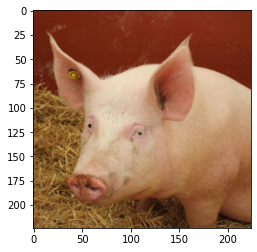

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

pig_img = Image.open("pig.jpg")

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
])
pig_tensor = preprocess(pig_img)[None,:,:,:]
plt.imshow(pig_tensor[0].numpy().transpose(1,2,0))

In [9]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return ((x - self.mean.type_as(x)[None,:,None,None])/self.std.type_as(x)[None,:,None,None])

norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
model = resnet50(pretrained = True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
pred = model(norm(pig_tensor))

In [11]:
print(pred)

tensor([[ 3.7593e+00,  3.2503e+00,  1.5318e+00,  2.0089e+00,  1.0908e+00,
          5.3037e+00,  2.8494e+00,  3.4273e+00,  3.3158e+00,  1.0625e+00,
         -1.0410e+00, -5.4555e-01, -1.2763e+00, -9.0664e-01, -1.4103e+00,
          1.9982e-01, -3.2718e+00, -2.2336e+00, -3.3918e-01, -5.3908e-01,
         -1.4593e+00, -3.2748e+00, -3.1585e+00,  1.2886e+00, -2.6868e+00,
          8.4224e-01,  1.2508e+00,  1.8760e+00,  1.7243e+00,  6.5247e+00,
         -6.9164e-01, -5.9965e-01,  1.4849e+00,  4.0206e+00,  3.2613e+00,
          1.2940e+00,  2.3770e+00,  1.4365e+00,  2.3621e+00, -8.6792e-01,
         -1.8666e+00, -4.1171e-02, -1.4949e+00, -8.8088e-02,  8.5850e-01,
          5.0927e-01, -1.9038e+00,  3.2701e+00,  7.5257e-01,  1.4365e+00,
          3.4214e-01,  4.5331e+00,  2.4282e+00, -1.2705e+00,  9.5924e-01,
         -1.5547e+00, -3.1129e-01, -7.0777e-01, -2.4607e+00, -1.4731e+00,
          5.5937e-01,  1.8268e+00,  8.5339e-01, -8.0821e-01, -5.6806e-01,
          2.5732e+00,  1.7862e+00, -4.

In [12]:
import json
with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i,x in json.load(f).items()}
print(imagenet_classes[pred.max(dim=1)[1].item()])

hog


In [13]:
print(imagenet_classes)

{0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ringneck_snake', 54: 'hogn

In [14]:
print(nn.CrossEntropyLoss()(pred,torch.LongTensor([341])).item())

0.003882253309711814


In [15]:
import torch.optim as optim
epsilon = 2./255
delta = torch.zeros_like(pig_tensor, requires_grad = True)
opt = optim.SGD([delta], lr = 1e-1)

for t in range(30):
    pred = model(norm(pig_tensor+delta))
    loss = -nn.CrossEntropyLoss()(pred,torch.LongTensor([341]))
    if t % 5 == 0:
        print(t, loss.item())
    opt.zero_grad()
    loss.backward()
    opt.step()
    delta.data.clamp_(-epsilon,epsilon)
print("True class probability:", nn.Softmax(dim=1)(pred)[0,341].item())

0 -0.003882253309711814
5 -0.006934622768312693
10 -0.01581002026796341
15 -0.08004747331142426
20 -11.808460235595703
25 -13.362997055053711
True class probability: 1.7052112610826953e-08


In [16]:
max_class = pred.max(dim=1)[1].item()
print("Predicted class: ", imagenet_classes[max_class])
print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())

Predicted class:  wombat
Predicted probability: 0.9999711513519287


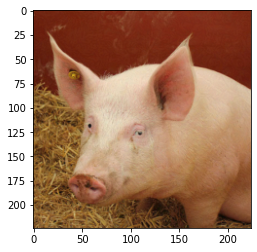

In [17]:
plt.imshow((pig_tensor + delta)[0].detach().numpy().transpose(1,2,0))

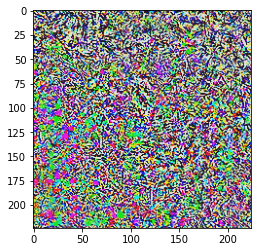

In [18]:
plt.imshow((50*delta+0.5)[0].detach().numpy().transpose(1,2,0))
from torchvision.utils import save_image
save_image((pig_tensor+delta), "untargeted_pig.jpg")

In [21]:
delta = torch.zeros_like(pig_tensor, requires_grad = True)
opt = optim.SGD([delta], lr = 5e-3)

for t in range(1000):
    pred = model(norm(pig_tensor+delta))
    loss = nn.CrossEntropyLoss()(pred,torch.LongTensor([404]))-nn.CrossEntropyLoss()(pred,torch.LongTensor([341]))
    if t % 5 == 0:
        print(t, loss.item())
    opt.zero_grad()
    loss.backward()
    opt.step()
    delta.data.clamp_(-epsilon,epsilon)
print("True class probability:", nn.Softmax(dim=1)(pred)[0,341].item())

0 24.00604820251465
5 4.9524641036987305
10 -0.08619499206542969
15 -3.5061941146850586
20 -7.8495564460754395
25 -11.394068717956543
30 -14.381844520568848
35 -17.303415298461914
40 -21.099990844726562
45 -23.098806381225586
50 -25.272674560546875
55 -27.681045532226562
60 -28.724430084228516
65 -31.90072250366211
70 -34.12318801879883
75 -34.83412551879883
80 -35.852577209472656
85 -38.72392272949219
90 -32.94467544555664
95 -40.85820388793945
100 -41.3267936706543
105 -44.27433776855469
110 -39.751365661621094
115 -40.791297912597656
120 -30.74896812438965
125 -48.15968322753906
130 -38.0746955871582
135 -51.791412353515625
140 -51.92652130126953
145 -50.84364700317383
150 -53.40891647338867
155 -54.062255859375
160 -59.3270149230957
165 -57.548728942871094
170 -54.986698150634766
175 -56.3858757019043
180 -59.726661682128906
185 -54.131431579589844
190 -56.51824188232422
195 -62.56005859375
200 -62.38727569580078
205 -53.6776123046875
210 -61.34967803955078
215 -68.1861343383789
22

In [22]:
max_class = pred.max(dim=1)[1].item()
print("Predicted class: ", imagenet_classes[max_class])
print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())

Predicted class:  airliner
Predicted probability: 0.9999994039535522


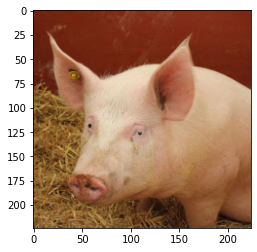

In [23]:
plt.imshow((pig_tensor + delta)[0].detach().numpy().transpose(1,2,0))

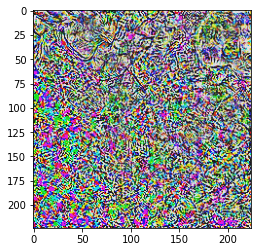

In [24]:
plt.imshow((50*delta+0.5)[0].detach().numpy().transpose(1,2,0))
save_image((pig_tensor+delta), "targeted_pig.jpg")

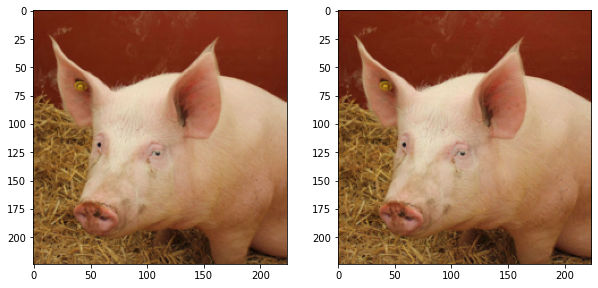

In [15]:
f,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow((pig_tensor)[0].detach().numpy().transpose(1,2,0))
ax[1].imshow((pig_tensor + delta)[0].detach().numpy().transpose(1,2,0))

In [ ]:
#gradcam++ -- Crucial areas of classification
# How attack changes these regions -- using gracam++
# YOLO
# GradCam

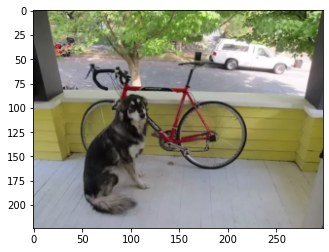

In [3]:
dcc_img = Image.open("dcc.png")
dcc_tensor = preprocess(dcc_img)[None,:,:,:]
plt.imshow(dcc_tensor[0].numpy().transpose(1,2,0))

In [4]:
pred2 = model(norm(dcc_tensor))

In [9]:
max_class = pred2.max(dim=1)[1].item()
print(nn.Softmax(dim=1)(pred2)[0,max_class].item())

0.21659716963768005


In [7]:
print(imagenet_classes[pred2.max(dim=1)[1].item()])

Siberian_husky


In [8]:
import torch.optim as optim
epsilon = 2./255
delta = torch.zeros_like(dcc_tensor, requires_grad = True)
opt = optim.SGD([delta], lr = 1e-1)

for t in range(30):
    pred = model(norm(dcc_tensor+delta))
    loss = -nn.CrossEntropyLoss()(pred2,torch.LongTensor([250]))
    if t % 5 == 0:
        print(t, loss.item())
    opt.zero_grad()
    loss.backward(retain_graph=True)
    opt.step()
    delta.data.clamp_(-epsilon,epsilon)
print("True class probability:", nn.Softmax(dim=1)(pred2)[0,250].item())

0 -1.5297160148620605
5 -1.5297160148620605
10 -1.5297160148620605
15 -1.5297160148620605
20 -1.5297160148620605
25 -1.5297160148620605
True class probability: 0.21659716963768005


In [29]:
pred3 = model(norm(dcc_tensor + delta))

RuntimeError: The size of tensor a (298) must match the size of tensor b (224) at non-singleton dimension 3